In [1]:
import Network_Generator as ng

In [2]:
import EDM_Generator as eg

In [3]:
import numpy as np

In [4]:
import networkx as nx

In [5]:
import Graph_Analyser as ga

In [6]:
import Plotting as plot

In [7]:
import Attack_Detection as ad

In [8]:
import time
start_time = time.time()

COMPOSED SPARSE EDM:
[[99.   8.5 99.   7.5  6.5  6.5 99.   5.  99.   6. ]
 [ 8.5 99.   8.   1.5 99.  99.  99.   6.5  6.5  3.5]
 [99.   8.  99.  99.   2.   5.  99.  99.  99.  99. ]
 [ 7.5  1.5 99.  99.   5.   4.5  4.5  5.   3.   5.5]
 [ 6.5 99.   2.   5.  99.   8.   1.5  7.5 99.   6. ]
 [ 6.5 99.   5.   4.5  8.  99.   6.   8.   2.5  5.5]
 [99.  99.  99.   4.5  1.5  6.  99.   5.   9.   6. ]
 [ 5.   6.5 99.   5.   7.5  8.   5.  99.  99.   6. ]
 [99.   6.5 99.   3.  99.   2.5  9.  99.  99.  10. ]
 [ 6.   3.5 99.   5.5  6.   5.5  6.   6.  10.  99. ]]
Original Network Layout
[[99.          1.25       99.          5.20216301  5.15388203  6.56220237
  99.          8.32165849 99.          9.16856041]
 [ 1.25       99.          2.6925824   4.03112887 99.         99.
  99.          7.97260936  7.35272058  8.06225775]
 [99.          2.6925824  99.         99.          5.38516481  3.90512484
  99.         99.         99.         99.        ]
 [ 5.20216301  4.03112887 99.         99.          1.4142

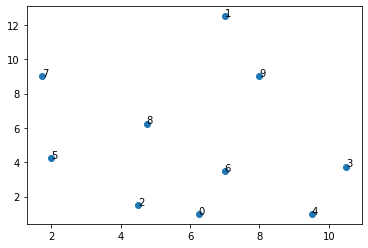

In [187]:
node_points_original = [
    [0,6.25,1],
    [1,7,12.5],
    [2,4.5,1.5],
    [3,10.5,3.75],
    [4,9.5,1],
    [5,2,4.25],
    [6,7,3.5],
    [7,1.75,9],
    [8,4.75,6.25],
    [9,8,9]
]

node_points_attacked = [
    [0,6.25,1],
    [1,7,12.5],
    [2,4.5,1.5],
    [3,10.5,3.75],
    [4,9.5,1],
    [5,2,4.25],
    [6,7,3.5],
    [7,9.75,1],
    [8,4.75,6.25],
    [9,8,9]
]

base_emd = eg.generate_random_sparse_edm((10,10),99,10,0,0.15)
edm_original = eg.eclid_calc_EDM(node_points=node_points_original, infinity=99,edm=base_emd)


edm_attacked = eg.eclid_calc_EDM(node_points=node_points_attacked,infinity=99,edm=base_emd)

removed_nodes = []
for rn in removed_nodes:
    edm_attacked = eg.remove_node(rn,edm_attacked,99)
    del node_points_attacked[rn]
    

print("Original Network Layout")
plot.plot_network_layout(node_points_original)
print(edm_original)

Attacked Network Layout
[[99.          1.25       99.          5.20216301  5.15388203  6.56220237
  99.          7.82623792 99.          9.16856041]
 [ 1.25       99.          2.6925824   4.03112887 99.         99.
  99.          6.60018939  7.35272058  8.06225775]
 [99.          2.6925824  99.         99.          5.38516481  3.90512484
  99.         99.         99.         99.        ]
 [ 5.20216301  4.03112887 99.         99.          1.41421356  8.7321246
   4.60977223  4.06970515  7.61987533  6.5       ]
 [ 5.15388203 99.          5.38516481  1.41421356 99.          7.56637298
   3.20156212  3.01039864 99.          5.22015325]
 [ 6.56220237 99.          3.90512484  8.7321246   7.56637298 99.
   5.09901951  8.0039053   4.06970515  7.21110255]
 [99.         99.         99.          4.60977223  3.20156212  5.09901951
  99.          2.92617498  3.01039864  3.16227766]
 [ 7.82623792  6.60018939 99.          4.06970515  3.01039864  8.0039053
   2.92617498 99.         99.          2.6575

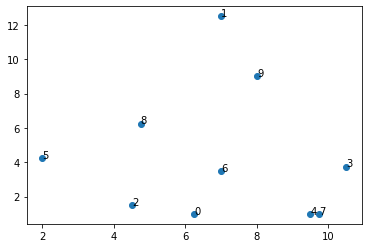

In [188]:
print("Attacked Network Layout")
plot.plot_network_layout(node_points_attacked)
print(edm_attacked)

In [189]:
import Graph_Reducer as gr

In [190]:
reduced_graph_original, entropy_matrix_original = gr.Reduce_Graph(edm=edm_original,removed_nodes_indices=[])
print(entropy_matrix_original)

[ 3  4  4 12  4 12  3  3  3 12]


In [191]:
reduced_graph_attacked, entropy_matrix_attacked = gr.Reduce_Graph(edm=edm_attacked,removed_nodes_indices=removed_nodes)
print(entropy_matrix_attacked)

[ 3  4  4 12  4 12  3  3  3 12]


In [192]:
entropy_matrix_original = entropy_matrix_original / min(entropy_matrix_original)
entropy_matrix_attacked = entropy_matrix_attacked / min(entropy_matrix_attacked)

Original Network

GENERATED GRAPH:


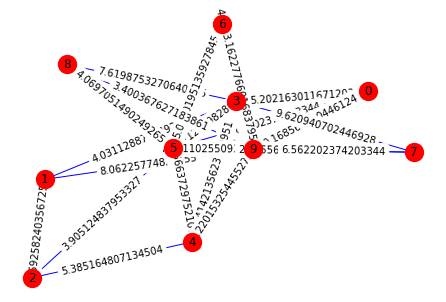

In [193]:
print("Original Network")
plot.plot(reduced_graph_original)

Attacked Network

GENERATED GRAPH:


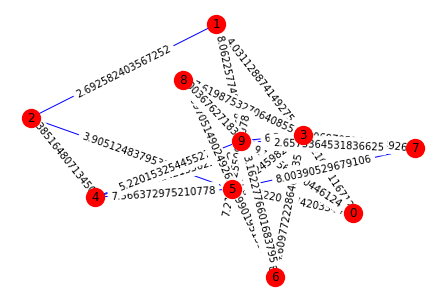

In [194]:
print("Attacked Network")
plot.plot(reduced_graph_attacked)

In [195]:
import Clustering as clust

In [196]:
max_edge_original = sorted(reduced_graph_original.edges.data('weight'), 
                      key=lambda x:x[2])[len(reduced_graph_original.edges)-1][2]

max_edge_attacked = sorted(reduced_graph_attacked.edges.data('weight'), 
                      key=lambda x:x[2])[len(reduced_graph_attacked.edges)-1][2]

In [197]:
entropy_matrix_original = entropy_matrix_original / max(entropy_matrix_original)
entropy_matrix_attacked = entropy_matrix_attacked / max(entropy_matrix_attacked)

In [198]:
from copy import copy, deepcopy

### Original Network Clustering

In [199]:
entropy_matrix_test_original = deepcopy(entropy_matrix_original)
graph_test_original = reduced_graph_original
growth_rate_original = 0.25

clusters_original = []

iteration_original = 1
graph_edges_original = list(reduced_graph_original.edges.data('weight'))
min_entropy_original = 0
max_edge_original = sorted(reduced_graph_original.edges.data('weight'), key=lambda x:x[2])[len(reduced_graph_original.edges)-1][2]
while min_entropy_original < max_edge_original:
    #iterate the node in the graph
    #node is the currently selected node
    for node in range(len(entropy_matrix_test_original)):
        #entropy_mnatrix[node] is the entropy value of that node
        node_entropy_original = entropy_matrix_test_original[node]
        if node_entropy_original > max_edge_original:
            continue
        #local_cluster will store the clusters for this itteration
        local_cluster_original = []
        #get all other nodes that reside within the radius of the nodes entropy
        for edge in range(len(graph_edges_original)):
            if graph_edges_original[edge][0] == node:
                if graph_edges_original[edge][2] <= node_entropy_original:
                    print(np.array([graph_edges_original[edge][0],graph_edges_original[edge][1],graph_edges_original[edge][2]]))
                    local_cluster_original.append(np.array([graph_edges_original[edge][0],graph_edges_original[edge][1],graph_edges_original[edge][2]]))
        if len(local_cluster_original) > 0:            
            clusters_original.append(np.array(local_cluster_original))        

    #increase entropy of the node by the growth rate
    #entropy_matrix_test *= 1+growth_rate
    entropy_matrix_test_original += growth_rate_original
    min_entropy_original = min(entropy_matrix_test_original)
    iteration_original+=1

[3.         4.         1.41421356]
[3.         4.         1.41421356]
[3.         4.         1.41421356]
[3.         4.         1.41421356]
[5.         7.         2.01556444]
[3.         4.         1.41421356]
[5.         7.         2.01556444]
[3.         4.         1.41421356]
[5.         7.         2.01556444]
[3.         4.         1.41421356]
[5.         7.         2.01556444]
[3.         4.         1.41421356]
[5.         7.         2.01556444]
[1.        2.        2.6925824]
[3.         4.         1.41421356]
[5.         7.         2.01556444]
[1.        2.        2.6925824]
[3.         4.         1.41421356]
[5.         7.         2.01556444]
[1.        2.        2.6925824]
[3.         4.         1.41421356]
[5.         7.         2.01556444]
[6.         9.         3.16227766]
[1.        2.        2.6925824]
[3.         4.         1.41421356]
[5.         7.         2.01556444]
[5.         8.         4.06970515]
[6.         9.         3.16227766]
[8.         9.         3.4003676

### Attacked Network Clustering

In [200]:
entropy_matrix_test_attacked = deepcopy(entropy_matrix_attacked)
graph_test_attacked = reduced_graph_attacked
growth_rate_attacked = 0.25

clusters_attacked = []

iteration_attacked = 1
graph_edges_attacked = list(reduced_graph_attacked.edges.data('weight'))
min_entropy_attacked = 0
max_edge_attacked = sorted(reduced_graph_attacked.edges.data('weight'), key=lambda x:x[2])[len(reduced_graph_attacked.edges)-1][2]
while min_entropy_attacked < max_edge_attacked:
    #iterate the node in the graph
    #node is the currently selected node
    for node in range(len(entropy_matrix_test_attacked)):
        #entropy_mnatrix[node] is the entropy value of that node
        node_entropy_attacked = entropy_matrix_test_attacked[node]
        if node_entropy_attacked > max_edge_attacked:
            continue
        #local_cluster will store the clusters for this itteration
        local_cluster_attacked = []
        #get all other nodes that reside within the radius of the nodes entropy
        for edge in range(len(graph_edges_attacked)):
            if graph_edges_attacked[edge][0] == node:
                if graph_edges_attacked[edge][2] <= node_entropy_attacked:
                    local_cluster_attacked.append(np.array([graph_edges_attacked[edge][0],graph_edges_attacked[edge][1],graph_edges_attacked[edge][2]]))
        if len(local_cluster_attacked) > 0:
            clusters_attacked.append(np.array(local_cluster_attacked))        

    #increase entropy of the node by the growth rate
    #entropy_matrix_test *= 1+growth_rate
    entropy_matrix_test_attacked += growth_rate_attacked
    min_entropy_attacked = min(entropy_matrix_test_attacked)
    #print(min_entropy_attacked)
    iteration_attacked+=1

In [201]:
def init_list_of_objects(size):
    list_of_objects = list()
    for i in range(0,size):
        list_of_objects.append( list() ) #different object reference each time
    return list_of_objects

In [202]:
grouped_clusters_original = init_list_of_objects(len(entropy_matrix_original))
grouped_clusters_attacked = init_list_of_objects(len(entropy_matrix_attacked))

In [203]:
#print("Analysing Original Clusters.....")
for cluster in range(len(clusters_original)):
    #print(len(clusters_original[cluster]),clusters_original[cluster])
    cluster_size = len(clusters_original[cluster])
    grouped_clusters_original[cluster_size-1].append(clusters_original[cluster])
    
#print("Analysing Attacked Clusters.....")
for cluster in range(len(clusters_attacked)):
    #print(len(clusters_attacked[cluster]),clusters_attacked[cluster])
    cluster_size = len(clusters_attacked[cluster])
    grouped_clusters_attacked[cluster_size-1].append(clusters_attacked[cluster])

In [204]:
unique_grouped_clusters_original = init_list_of_objects(len(grouped_clusters_original))
#Get Unique entries to each group
for group in range(len(grouped_clusters_original)):
    if len(grouped_clusters_original[group]) > 0:
        unique_grouped_clusters_original[group] = np.unique(grouped_clusters_original[group],axis=0)


unique_grouped_clusters_attacked = init_list_of_objects(len(grouped_clusters_attacked))
#Get Unique entries to each group
for group in range(len(grouped_clusters_attacked)):
    if len(grouped_clusters_attacked[group]) > 0:
        unique_grouped_clusters_attacked[group] = np.unique(grouped_clusters_attacked[group],axis=0)


In [205]:
print(unique_grouped_clusters_original[1])

[[[0.         3.         5.20216301]
  [0.         5.         6.56220237]]

 [[1.         3.         4.03112887]
  [1.         2.         2.6925824 ]]

 [[2.         5.         3.90512484]
  [2.         4.         5.38516481]]

 [[3.         4.         1.41421356]
  [3.         6.         4.60977223]]

 [[4.         5.         7.56637298]
  [4.         9.         5.22015325]]

 [[5.         7.         2.01556444]
  [5.         8.         4.06970515]]]


In [206]:
print(unique_grouped_clusters_attacked[1])

[[[0.         3.         5.20216301]
  [0.         5.         6.56220237]]

 [[1.         3.         4.03112887]
  [1.         2.         2.6925824 ]]

 [[2.         5.         3.90512484]
  [2.         4.         5.38516481]]

 [[3.         4.         1.41421356]
  [3.         7.         4.06970515]]

 [[4.         5.         7.56637298]
  [4.         9.         5.22015325]]

 [[5.         8.         4.06970515]
  [5.         6.         5.09901951]]]


Cluster Alignment based on centriods of clusters

Boolean encoding of participation of nodes in clusters

In [222]:
node_count = 10
clusterA = unique_grouped_clusters_original[1]
clusterB = unique_grouped_clusters_attacked[1]
trimmed_original_clustersA = []
trimmed_attacked_clustersB = []
for i in range(len(clusterA)):
    trimmed_original_clustersA.append([np.unique(np.delete(clust,2,0)) for clust in clusterA[i]])
for i in range(len(clusterB)):
    trimmed_attacked_clustersB.append([np.unique(np.delete(clust,2,0)) for clust in clusterB[i]])

#print("A Clusters:\n", trimmed_original_clustersA)
#print("B Clusters:\n", trimmed_attacked_clustersB)
print("Len",len(trimmed_attacked_clustersB))
max_A = int(trimmed_original_clustersA[len(trimmed_original_clustersA)-1][0][0])
max_B = int(trimmed_attacked_clustersB[len(trimmed_attacked_clustersB)-1][0][0])

centriods_A = np.zeros(max_A+1)
centriods_B = np.zeros(max_A+1)

#iterate to find the cluster centriod nodes in A
for index in range(len(trimmed_original_clustersA)):
    centriods_A[int(trimmed_original_clustersA[index][0][0])] = 1
                        
#iterate to find the cluster centriod nodes in B
for index in range(len(trimmed_attacked_clustersB)):
    centriods_B[int(trimmed_attacked_clustersB[index][0][0])] = 1

#represents the clusters that are avalaible.
#when superimposed the new and missing clusters are clear
print("Centriod-Node Cluster Participation:\n\tA",centriods_A,"\n\tB",centriods_B)

#offsets to handel missaligned clusters
A_offset = 0
B_offset = 0

new_clusters = []
lost_clusters = []
same_centriod_clusters = [] 

#iterate over the clusters and apply analysis of the nodes in the corrisponding clusters
for clust in range(len(centriods_A)):
    print("Centriod Node:", clust)
    #check for alignment in the centroids
    print("A_O:",A_offset, "B_O",B_offset)
    #centriod clusters have same centriods
    if centriods_A[clust] == 1 and centriods_B[clust] == 1: 
        
        #participation arrays
        arr = np.zeros((node_count))
        arr2 = np.zeros((node_count))

        #get participation count array for A
        print("\tA:", trimmed_original_clustersA[clust - A_offset])
        for clus in trimmed_original_clustersA[clust - A_offset]:
            for node in clus:
                arr[int(node)]+=1

        #get participation count array for B
        print("\tB:", trimmed_attacked_clustersB[clust - B_offset])
        for clus in trimmed_attacked_clustersB[clust - B_offset]:
            for node in clus:
                arr2[int(node)]+=1

        #boolean "participation" encoding
        arr = (arr > 0).astype(int)
        arr2 = (arr2 > 0).astype(int)
        
        same_centriod_clusters.append([
            [trimmed_original_clustersA[clust - A_offset],arr], 
            [trimmed_attacked_clustersB[clust - B_offset],arr2]])
        
        #print resulting participation arrays
        print("\tA:",arr)
        print("\tB:",arr2)
    #Cluster only appears in A and not B
    elif centriods_A[clust] == 1 and centriods_B[clust] == 0:        
        print("\tOld Cluster Lost From Centriod Node:",clust - A_offset,"\n\tLost Cluster:", trimmed_original_clustersA[clust - A_offset])
        arr = np.zeros((node_count))
        for clus in trimmed_original_clustersA[clust - A_offset]:
            for node in clus:
                arr[int(node)]+=1   
        arr = (arr > 0).astype(int)
        lost_clusters.append([trimmed_original_clustersA[clust - A_offset],arr])
    #Cluster only appears in B and not A
    elif centriods_A[clust] == 0 and centriods_B[clust] == 1:
        print("\tNew Cluster Formed From Centriod Node:",clust,"\n\tNew Cluster:", trimmed_attacked_clustersB[clust - B_offset])
        arr = np.zeros((node_count))
        for clus in trimmed_attacked_clustersB[clust - B_offset]:
            for node in clus:
                arr[int(node)]+=1   
        arr = (arr > 0).astype(int)
        new_clusters.append([trimmed_attacked_clustersB[clust - B_offset],arr])
    #No Clusters with this centriod node
    elif centriods_A[clust] == 0 and centriods_B[clust] == 0: 
        print("\tThere are no clusters with the centriod node:", clust)
    #update offset for A
    if centriods_A[clust] == 0:
        A_offset +=1
    #update offset for B
    if centriods_B[clust] == 0:
        B_offset +=1


Len 6
Centriod-Node Cluster Participation:
	A [1. 1. 1. 1. 1. 1.] 
	B [1. 1. 1. 1. 1. 1.]
Centriod Node: 0
A_O: 0 B_O 0
	A: [array([0., 3.]), array([0., 5.])]
	B: [array([0., 3.]), array([0., 5.])]
	A: [1 0 0 1 0 1 0 0 0 0]
	B: [1 0 0 1 0 1 0 0 0 0]
Centriod Node: 1
A_O: 0 B_O 0
	A: [array([1., 3.]), array([1., 2.])]
	B: [array([1., 3.]), array([1., 2.])]
	A: [0 1 1 1 0 0 0 0 0 0]
	B: [0 1 1 1 0 0 0 0 0 0]
Centriod Node: 2
A_O: 0 B_O 0
	A: [array([2., 5.]), array([2., 4.])]
	B: [array([2., 5.]), array([2., 4.])]
	A: [0 0 1 0 1 1 0 0 0 0]
	B: [0 0 1 0 1 1 0 0 0 0]
Centriod Node: 3
A_O: 0 B_O 0
	A: [array([3., 4.]), array([3., 6.])]
	B: [array([3., 4.]), array([3., 7.])]
	A: [0 0 0 1 1 0 1 0 0 0]
	B: [0 0 0 1 1 0 0 1 0 0]
Centriod Node: 4
A_O: 0 B_O 0
	A: [array([4., 5.]), array([4., 9.])]
	B: [array([4., 5.]), array([4., 9.])]
	A: [0 0 0 0 1 1 0 0 0 1]
	B: [0 0 0 0 1 1 0 0 0 1]
Centriod Node: 5
A_O: 0 B_O 0
	A: [array([5., 7.]), array([5., 8.])]
	B: [array([5., 8.]), array([5., 6.])]
	A

### Quick Analysis
The Centriod-Node Cluster Participation array does show the cahnges in the centriod-node clusters from before and after the attack. This can be a first stop to finding the node(s) that have been attacked. 

### Scenarios

### New Cluster: "A new cluster has been formed with a new centriod-node in the attacked network".

   #### Attack Test:
    Check all clustrs are the same centriod-node and then check that cluster for differences in the nodes in the cluster
    
   #### Solution:
    Check the individual clusters for difference nodes in that cluster
    find if that nodee then intersects with other clusters in the same way.
    try to locate node that has moved between other clusters it previously existed in.

### Lost Cluster: "A cluster is no longer formed usign the same centriod-node."

   #### Attack Test:    
    Check all nodes for membership in other clusters that haven't got a percieved change in centriod-node.    
    These checks much also account for centriod-node cluusters that have also experienced change themselves. 
    
   #### Solution:
    A dependancy tree which can be dummbed the membership tree mush be created. The tree is made up of the ranking for each node as it is located in more and more clusters. More intersections is correct clusters the better. The checking this value against other node in the clusters. This could be very complex analysis but this is what should solve the problem
    
### Centriod Clusters Match: "All the clusters have the same centriod-nodes"

   #### Attack Test:
    Check all clusters for differences of node memebership before and after the attack
    
   #### Solution:
    Find nodes that don't intersect as before and then locate all nodes in other clusters and check for changes. 
    

In [208]:
#Collect all cluster not changed.
print("Same centriod-node:",len(same_centriod_clusters),"\n\tStructure: [[[[arrayA],[participation]],[[arrayB],[participation]]]]\n\t:",same_centriod_clusters,"\n")
#collect all clusters New.
print("New centriod-node:",len(new_clusters),"\n\tStructure: [[new_cluster]]\n\t:",(new_clusters),"\n")
#collect all clusters lost.
print("Lost centriod-node:",len(lost_clusters),"\n\tStructure: [[lost_cluster]]\n\t:",(lost_clusters),"\n")

Same centriod-node: 6 
	Structure: [[[[arrayA],[participation]],[[arrayB],[participation]]]]
	: [[[[array([0., 3.]), array([0., 5.])], array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0])], [[array([0., 3.]), array([0., 5.])], array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0])]], [[[array([1., 3.]), array([1., 2.])], array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])], [[array([1., 3.]), array([1., 2.])], array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])]], [[[array([2., 5.]), array([2., 4.])], array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0])], [[array([2., 5.]), array([2., 4.])], array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0])]], [[[array([3., 4.]), array([3., 6.])], array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0])], [[array([3., 4.]), array([3., 7.])], array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0])]], [[[array([4., 5.]), array([4., 9.])], array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])], [[array([4., 5.]), array([4., 9.])], array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])]], [[[array([5., 7.]), array([5., 8.])], array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0])], [[array([5., 8.]), array([5., 6.])], array([0

In [219]:
def attack_analysis(same_centriod_clusters,new_clusters, lost_clusters):    
    #rule out that network has remaind the same
    
    #print("Clustersthat remained the same:",len(same_centriod_clusters))
    #print("New Clusters:",len(new_clusters))
    #print("Lost Clusters:",len(lost_clusters))
    
    #check the number of cluster that are the "same"
    is_same_number = (len(new_clusters) == 0 and lost_clusters == 0)
    #print("Cluster Count Same: ", is_same_number)    
    
    #check that the centriod nodes are the same
    is_centriods_same = True
    for scc in same_centriod_clusters:
        if not np.array_equal(scc[0][1][0], scc[1][1][0]):
            print("Centriod changed from:",scc[0][1][0],"to:", scc[1][1][0])
    #print("Centriod Nodes Same:", is_centriods_same)
    
    #check that the composition of the clusters are the same    
    is_nodes_same = True
    for scc in same_centriod_clusters:
        if not np.array_equal(scc[0][1], scc[1][1]):
            #print("Centriod changed: \n\tfrom:\t",scc[0][1],"\n\tto:\t", scc[1][1])
            is_nodes_same = False
    if not is_centriods_same:
        print()#"Nodes in Cluster Same:", is_nodes_same)
    
    #if all true then the network has remained the same and the change was undetectable if made
    if all([is_same_number,is_centriods_same,is_nodes_same]):
        print("Network has not detectably been attacked")
    else:
        print("An attack has occured")
        print("Running Attack Analysis...")
        
        #Attack Analysis
        
        alt_clusters = []
        same_clusters = []
        
        #filter the clusters for stable clusters and unstable clusters
        for scc in same_centriod_clusters:
            if not np.array_equal(scc[0][1],scc[1][1]):
                alt_clusters.append([scc[0][1],scc[1][1]])
            else:
                same_clusters.append([scc[0][1],scc[1][1]])
        print("Clusters that remain the same:\n",same_clusters) 
        print("clusters that are altered:\n",alt_clusters)
        temp_new = []
        for nc in new_clusters:
            temp_new.append(nc[1])
        new_clusters = temp_new
        print("clusters that are new:\n",new_clusters)
        temp_lost = []
        for nc in lost_clusters:
            temp_lost.append(nc[1])
        lost_clusters = temp_lost
        print("Clusters that are lost:\n",lost_clusters)
        
        cluster_intersects = np.zeros(10)
        
        #Analysis of lost nodes when the node is the centriod
        print("Analysis of Same")
        if len(same_clusters) > 0:
            attacked_nodes = []
            #first create a summation of intersections between the cluster(s) that are not lost
            for s_cluster in same_clusters:
                cluster_intersects += s_cluster[0]
            print("Cluster Intersections:",cluster_intersects)
            for l_cluster in lost_clusters:
                print("Analysing Lost Cluster:",l_cluster)
                local_diff = cluster_intersects - l_cluster                
                print("Local Difference:", local_diff)
                #for an in np.where(local_diff == -1)[0]:
                    #attacked_nodes.append(an)
                    
                    
        print("Analysis of Alt...")
        if len(alt_clusters) > 0:
            attacked_alt_nodes = []           
            for a_cluster in alt_clusters:
                print("Analysing Alterd Cluster:", a_cluster)
                local_diff = cluster_intersects - a_cluster
                print("Local Difference", local_diff)
                for an in np.where(local_diff == -1)[0]:
                    attacked_alt_nodes.append(an)
                    #print("AN:",an)
                    
                    
                    
        print("Analysis of New...")  
        if len(same_clusters) > 0 and len(lost_clusters) == 0:
            cluster_intersects_attacked = np.zeros(10)
            for s_cluster in new_clusters:
                cluster_intersects_attacked += new_clusters[0]
            print(cluster_intersects_attacked)
            print(cluster_intersects - cluster_intersects_attacked)
        
        
        
    return np.unique(attacked_nodes)

In [220]:
attack_analysis(same_centriod_clusters,new_clusters, lost_clusters)

An attack has occured
Running Attack Analysis...
Clusters that remain the same:
 [[array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0]), array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0])], [array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0]), array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])], [array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0]), array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0])], [array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1]), array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])]]
clusters that are altered:
 [[array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0]), array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0])], [array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0]), array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0])]]
clusters that are new:
 []
Clusters that are lost:
 []
Analysis of Same
Cluster Intersections: [1. 1. 2. 2. 2. 3. 0. 0. 0. 1.]
Analysis of Alt...
Analysing Alterd Cluster: [array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0]), array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0])]
Local Difference [[ 1.  1.  2.  1.  1.  3. -1.  0.  0.  1.]
 [ 1.  1.  2.  1.  1.  3.  0. -1.  0.  1.]]
Analysing Alterd Cluster: [array([0, 0, 0, 0, 0, 1, 0,

array([], dtype=float64)

In [ ]:
def same_cluster_resolver_mk1(same_centriod_clusters):
    print("Analysis Started...")
    attacked_nodes = []
    total_intersections = np.zeros(10)
    identical_clusters = []
    different_clusters = []
    all_clusters = []
    checked_nodes = []
    #iterate over the clusters to find difference
    for clust in same_centriod_clusters:
        #print("Cluster to Analyse:", clust)
        clusterA = np.array(clust[0][0])
        participationA_array = np.array(clust[0][1])
        clusterB = np.array(clust[1][0])
        participationB_array = np.array(clust[1][1])
        if np.array_equal(participationA_array, participationB_array):
            #identical clusters (no issue)
            #add the cluster from cluster list A. Either from A or B as they are identical arrrays
            identical_clusters.append(np.array([clusterA,participationA_array]))
            all_clusters.append(np.array([[clusterA,participationA_array],[clusterB,participationB_array],0]))
        else:
            #non-identical clusters (issue)
            #add this to the array for deeper checks
            different_clusters.append(np.array([[clusterA,participationA_array],[clusterB,participationB_array]]))
            all_clusters.append(np.array([[clusterA,participationA_array],[clusterB,participationB_array],1]))
    
    ###NOT SURE ABOUT THIS NEEDS THOUGHT###
    #if len(different_clusters) == len(same_centriod_clusters):
    #    #there is nothing to be identified as an attack
    #    print("No Attack Detected")
    #    return
    ######
    
    #Process the list of "attacked" clusters
    #iterate over the cluster that aren't identical. 
    print("Non-Identical clusters:", len(different_clusters))    
    for clust in all_clusters:
        nodes_to_check = [clust[0][0][0][0]]
        #print("Different Cluster:", clust)
        #iterate over the participation array and find problem nodes
        for node in range(len(clust[0][1])):
            #print(clust[0][1][node], "==",clust[1][1][node] , "=",clust[0][1][node]  == clust[1][1][node])            
            #need to check centriod node for membership  
            #check that the participation arrays agree for index of node in array
            if not (clust[0][1][node]  == clust[1][1][node]):
                nodes_to_check.append(node)               
            #the participation array has identifed a change in either of the arrays. 
            #check, in the "attacked" array, for membership to other clusters"
        nodes_to_check= np.array(nodes_to_check).astype(int)
        print("Nodes To Check =",len(nodes_to_check),":", nodes_to_check)        
        intersection_counts = np.zeros(10)
        
        print("Original Cluster Participation:",clust[0][1])
        print("Attacked Cluster Participation:",clust[1][1])
        
        for node in nodes_to_check: 
            print("Checking Node:", node)
            checked_nodes.append(node)
            for ic in all_clusters:
                if ic[0][0][0][0] == node:
                    #this is the centriod and is trsuted
                    print("\tCentriod Node:", node, "Cluster Size:",  len(ic[0][0]))
                    #print(ic[0])
                    intersection_counts[node]+= len(ic[0][0])
                    total_intersections[node] += len(ic[0][0])
                elif node in ic[0][0]:
                    #this means the node is a participant in the identical cluster
                    print("\tParticipant Node:", node,"Cluster:")
                    #print(ic[0])
                    intersection_counts[node] += 1
                    total_intersections[node] += 1
                else:
                    print("\tNode:", node,"Has not other intersections with old/new cluster:")
                    intersection_counts[node] -= 1
                    total_intersections[node] -= 1
                    #print(ic[0])
                
        print("Intersection Couter:", intersection_counts)
        final_set_intersections = []        
        for i in checked_nodes:            
            final_set_intersections.append(int(intersection_counts[int(i)]))
        sorted(intersection_counts)
        print("All Intersections for Nodes:", final_set_intersections)
        #print("Likely Attacked Nodes:", final_set_intersections[final_set_intersections == 0])
        #attacked_nodes.append(final_set_intersections[final_set_intersections == 0])
        print("Checked Nodes:", checked_nodes)
        print("Totals: ", total_intersections)
        print("Nodes of interest with intersections:")
        for n in range(len(total_intersections)):
              if n in checked_nodes:
                  print("\tNode:",n,"Intersections:",total_intersections[n])
    return (total_intersections)

In [ ]:
#same_cluster_resolver(same_centriod_clusters)